In [2]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

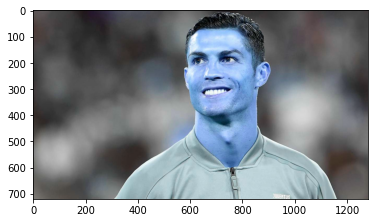

In [3]:
# Plotting the raw image
img = cv2.imread('C:\Coding\ML Practice\Sports Celebrity\model\dataset\cristiano_ronaldo\Champions League_ Juventus_ Cristiano.jpg')
plt.imshow(img)

In [4]:
# Converting image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

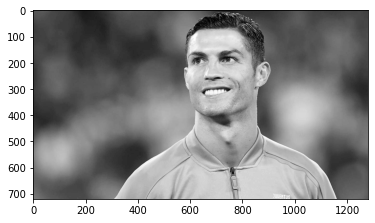

In [5]:
#Plotting grayscaled image
plt.imshow(gray, cmap='gray')

In [6]:
# Creating cascades for face and eye detection
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces #this gives x , y , width , height

array([[541,  67, 305, 305]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(541, 67, 305, 305)

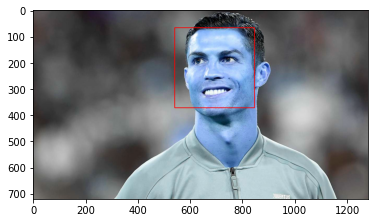

In [8]:
# Creating arectangle around face
face_img = cv2.rectangle(img, (x,y),(x+w, y+h),(255,0,0),2)
plt.imshow(face_img, cmap='gray')

## Data Cleaning

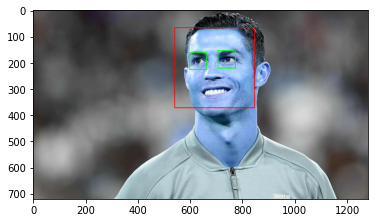

In [9]:
# Detect Two eyes

cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

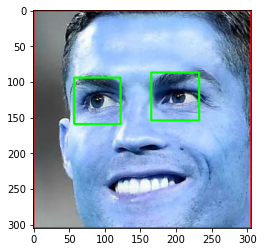

In [10]:
plt.imshow(roi_color, cmap='gray')

In [11]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>= 2:
            return roi_color

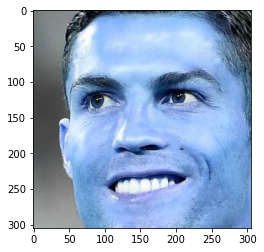

In [12]:
cropped = get_cropped_image('C:\Coding\ML Practice\Sports Celebrity\model\dataset\cristiano_ronaldo\Champions League_ Juventus_ Cristiano.jpg')
plt.imshow(cropped)

In [13]:
path_to_data = './dataset'
path_to_cr_data = './dataset/cropped'

In [15]:
import os
img_dirs = [] #this will store names of all directories in dataset directory
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [27]:
img_dirs

['./dataset\\cristiano_ronaldo',
 './dataset\\cropped',
 './dataset\\dani_alves',
 './dataset\\karim_benzema',
 './dataset\\kevin_de_bruyne',
 './dataset\\lionel_messi',
 './dataset\\luis_suarez',
 './dataset\\luka_modric',
 './dataset\\neymar_jr',
 './dataset\\robert_lewandowski',
 './dataset\\sergio_ramos']

In [28]:
import shutil
if os.path.exists(path_to_cr_data): #if the folder exists, we remove it first
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data) #we recreate it   

In [32]:
cropped_image_durs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    #print(celebrity_name)
    if celebrity_name != 'cropped':
        celebrity_file_names_dict[celebrity_name] = []
    
        for entry in os.scandir(img_dir):
            roi_color = get_cropped_image(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data + "/" + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.mkdir(cropped_folder)
                    print("Generating Cropped images in folder: ", cropped_folder)
                
                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1    

Generating Cropped images in folder:  ./dataset/cropped/dani_alves
Generating Cropped images in folder:  ./dataset/cropped/karim_benzema
Generating Cropped images in folder:  ./dataset/cropped/kevin_de_bruyne
Generating Cropped images in folder:  ./dataset/cropped/lionel_messi
Generating Cropped images in folder:  ./dataset/cropped/luis_suarez
Generating Cropped images in folder:  ./dataset/cropped/luka_modric
Generating Cropped images in folder:  ./dataset/cropped/neymar_jr
Generating Cropped images in folder:  ./dataset/cropped/robert_lewandowski
Generating Cropped images in folder:  ./dataset/cropped/sergio_ramos


## Wavelet Transformation

In [33]:
import pywt
import cv2

def w2d(img, mode='haar', level = 1):
    img = np.array(img, dtype=np.uint8)
    imArray = img
    # Datatype conversion
    # convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_BGR2GRAY)
    # convert to float
    # compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

(192, 192)

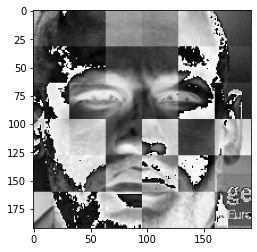

In [34]:
cropped_image = cv2.imread('C:/Coding/ML Practice/Sports Celebrity/model/dataset/cropped/neymar_jr/neymar_jr1.png')
cropped_image2 = cropped_image.astype(float)
# plt.imshow(cropped_image)
im_har = w2d(cropped_image2, 'db1', 5)
plt.imshow(im_har,cmap='gray')
im_har.shape

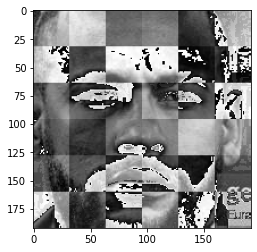

In [35]:

cropped_image = cv2.imread('C:/Coding/ML Practice/Sports Celebrity/model/dataset/cropped/neymar_jr/neymar_jr1.png')
cropped_image1 = cropped_image.astype(float)*255
# plt.imshow(cropped_image)
im_har = w2d(cropped_image1, 'db1', 5)
plt.imshow(im_har,cmap='gray')

In [36]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
    
class_dict    

{'cristiano_ronaldo': 0,
 'dani_alves': 1,
 'karim_benzema': 2,
 'kevin_de_bruyne': 3,
 'lionel_messi': 4,
 'luis_suarez': 5,
 'luka_modric': 6,
 'neymar_jr': 7,
 'robert_lewandowski': 8,
 'sergio_ramos': 9}

In [42]:
X,y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        img = img.astype(float)
        scaled_raw_image = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scaled_har_image = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scaled_raw_image.reshape(32*32*3,1),scaled_har_image.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [43]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(470, 4096)

In [80]:
X[0]

(array([247., 247., 247., ...,   0.,   0.,   0.]), 2)

## Model Training

 #### Using SVM with polynomial kernel tuned with heuristic finetuning

In [70]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.18, random_state=0 )
pipe = Pipeline([('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(degree = 1, cache_size=200, class_weight= None, gamma = 'auto', kernel = 'poly', C=100, tol=0.01, probability=True))])
# pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.7529411764705882

In [145]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.56      0.90      0.69        10
           1       1.00      0.40      0.57         5
           2       1.00      0.70      0.82        10
           3       0.75      0.50      0.60         6
           4       0.70      0.64      0.67        11
           5       0.77      1.00      0.87        10
           6       0.75      0.67      0.71         9
           7       0.82      0.75      0.78        12
           8       0.91      0.91      0.91        11
           9       0.33      1.00      0.50         1

    accuracy                           0.75        85
   macro avg       0.76      0.75      0.71        85
weighted avg       0.79      0.75      0.75        85



## Saving the trained model

In [146]:
import joblib
joblib.dump(pipe, 'saved_model.pkl')

['saved_model.pkl']

In [147]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))